## Contornos
***

Uma vez que você tenha detectado as bordas eu posso colocar um contorno nessas bordas como forma de delimitar exatamente os objetos que existe dentro dessa imagem.

***

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

def show(img):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

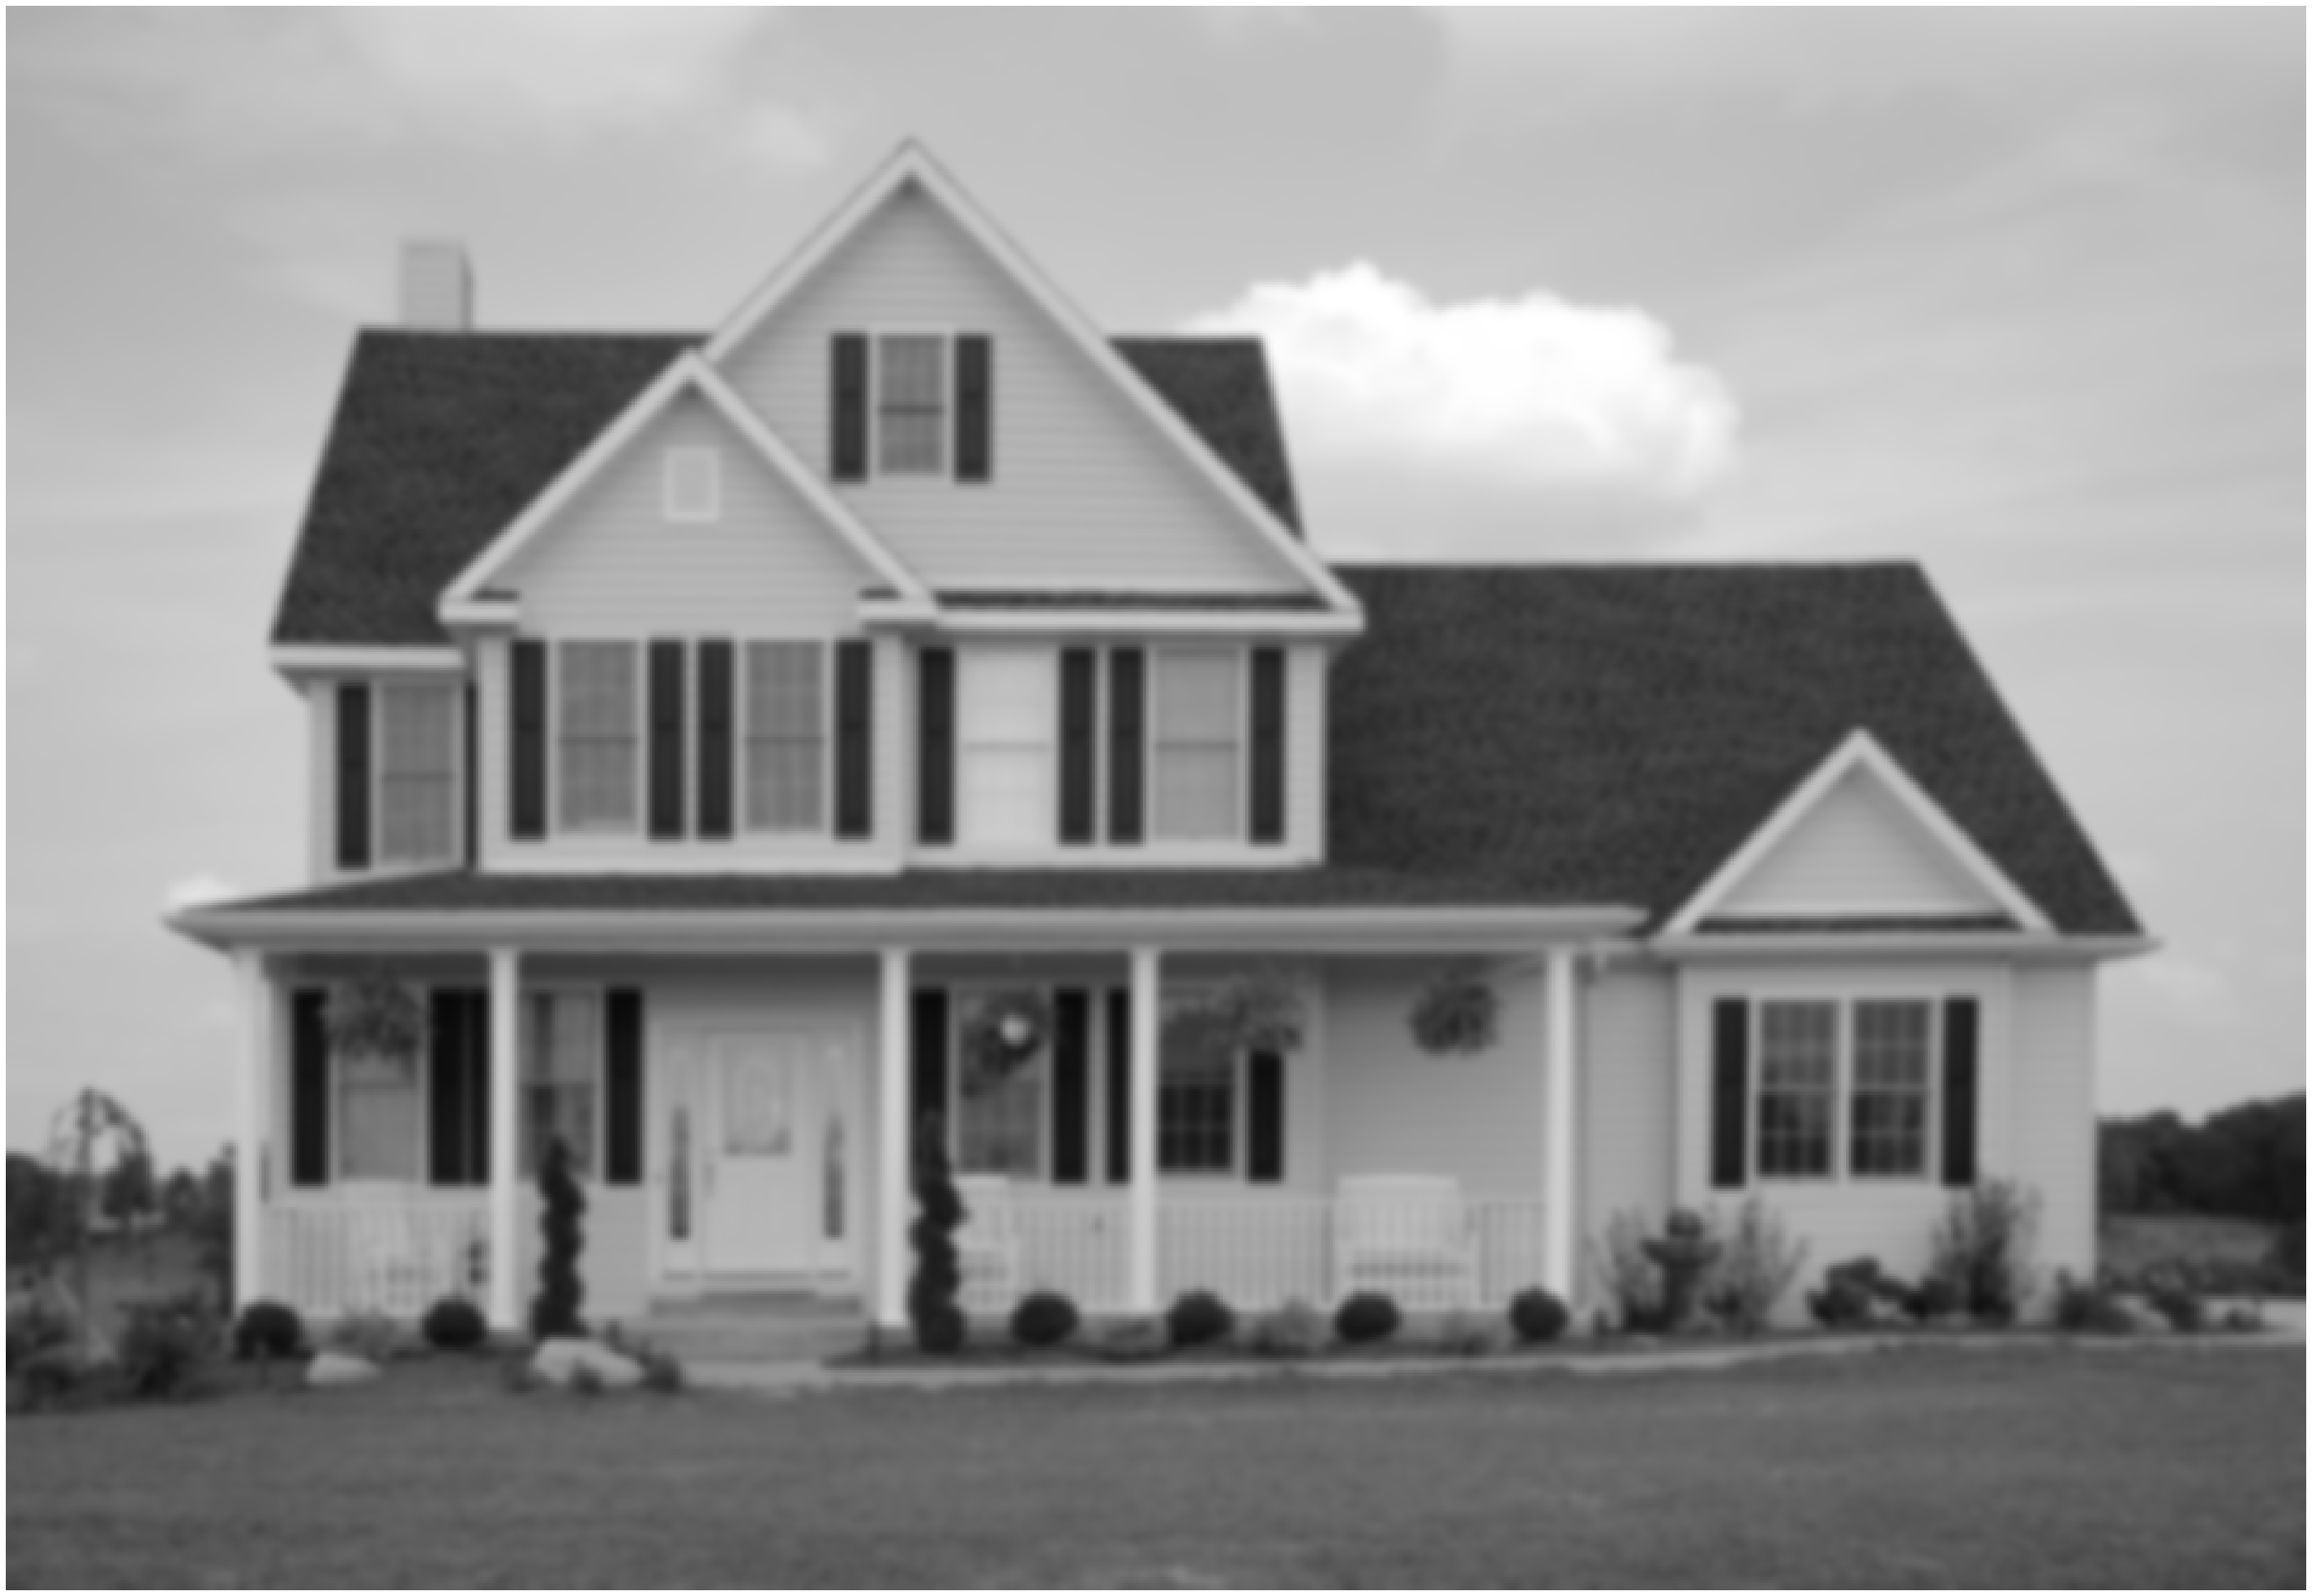

In [2]:
# Carregando a imagem e convertendo para escala de cinza
image = cv2.imread("imagens/casa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
show(blurred)

In [3]:
# Canny
edged = cv2.Canny(blurred, 30, 150)

In [4]:
# Encontra todos os contornos na imagem e desenha TODOS os contornos da imagem
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
# A função findCountours é destrutiva, ou seja, ela altera a imagem. Por isso fazemos uma cópia.
clone = image.copy()

In [6]:
# Desenha os contornos
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
print ("Encontrados {} contornos".format(len(cnts)))

Encontrados 110 contornos


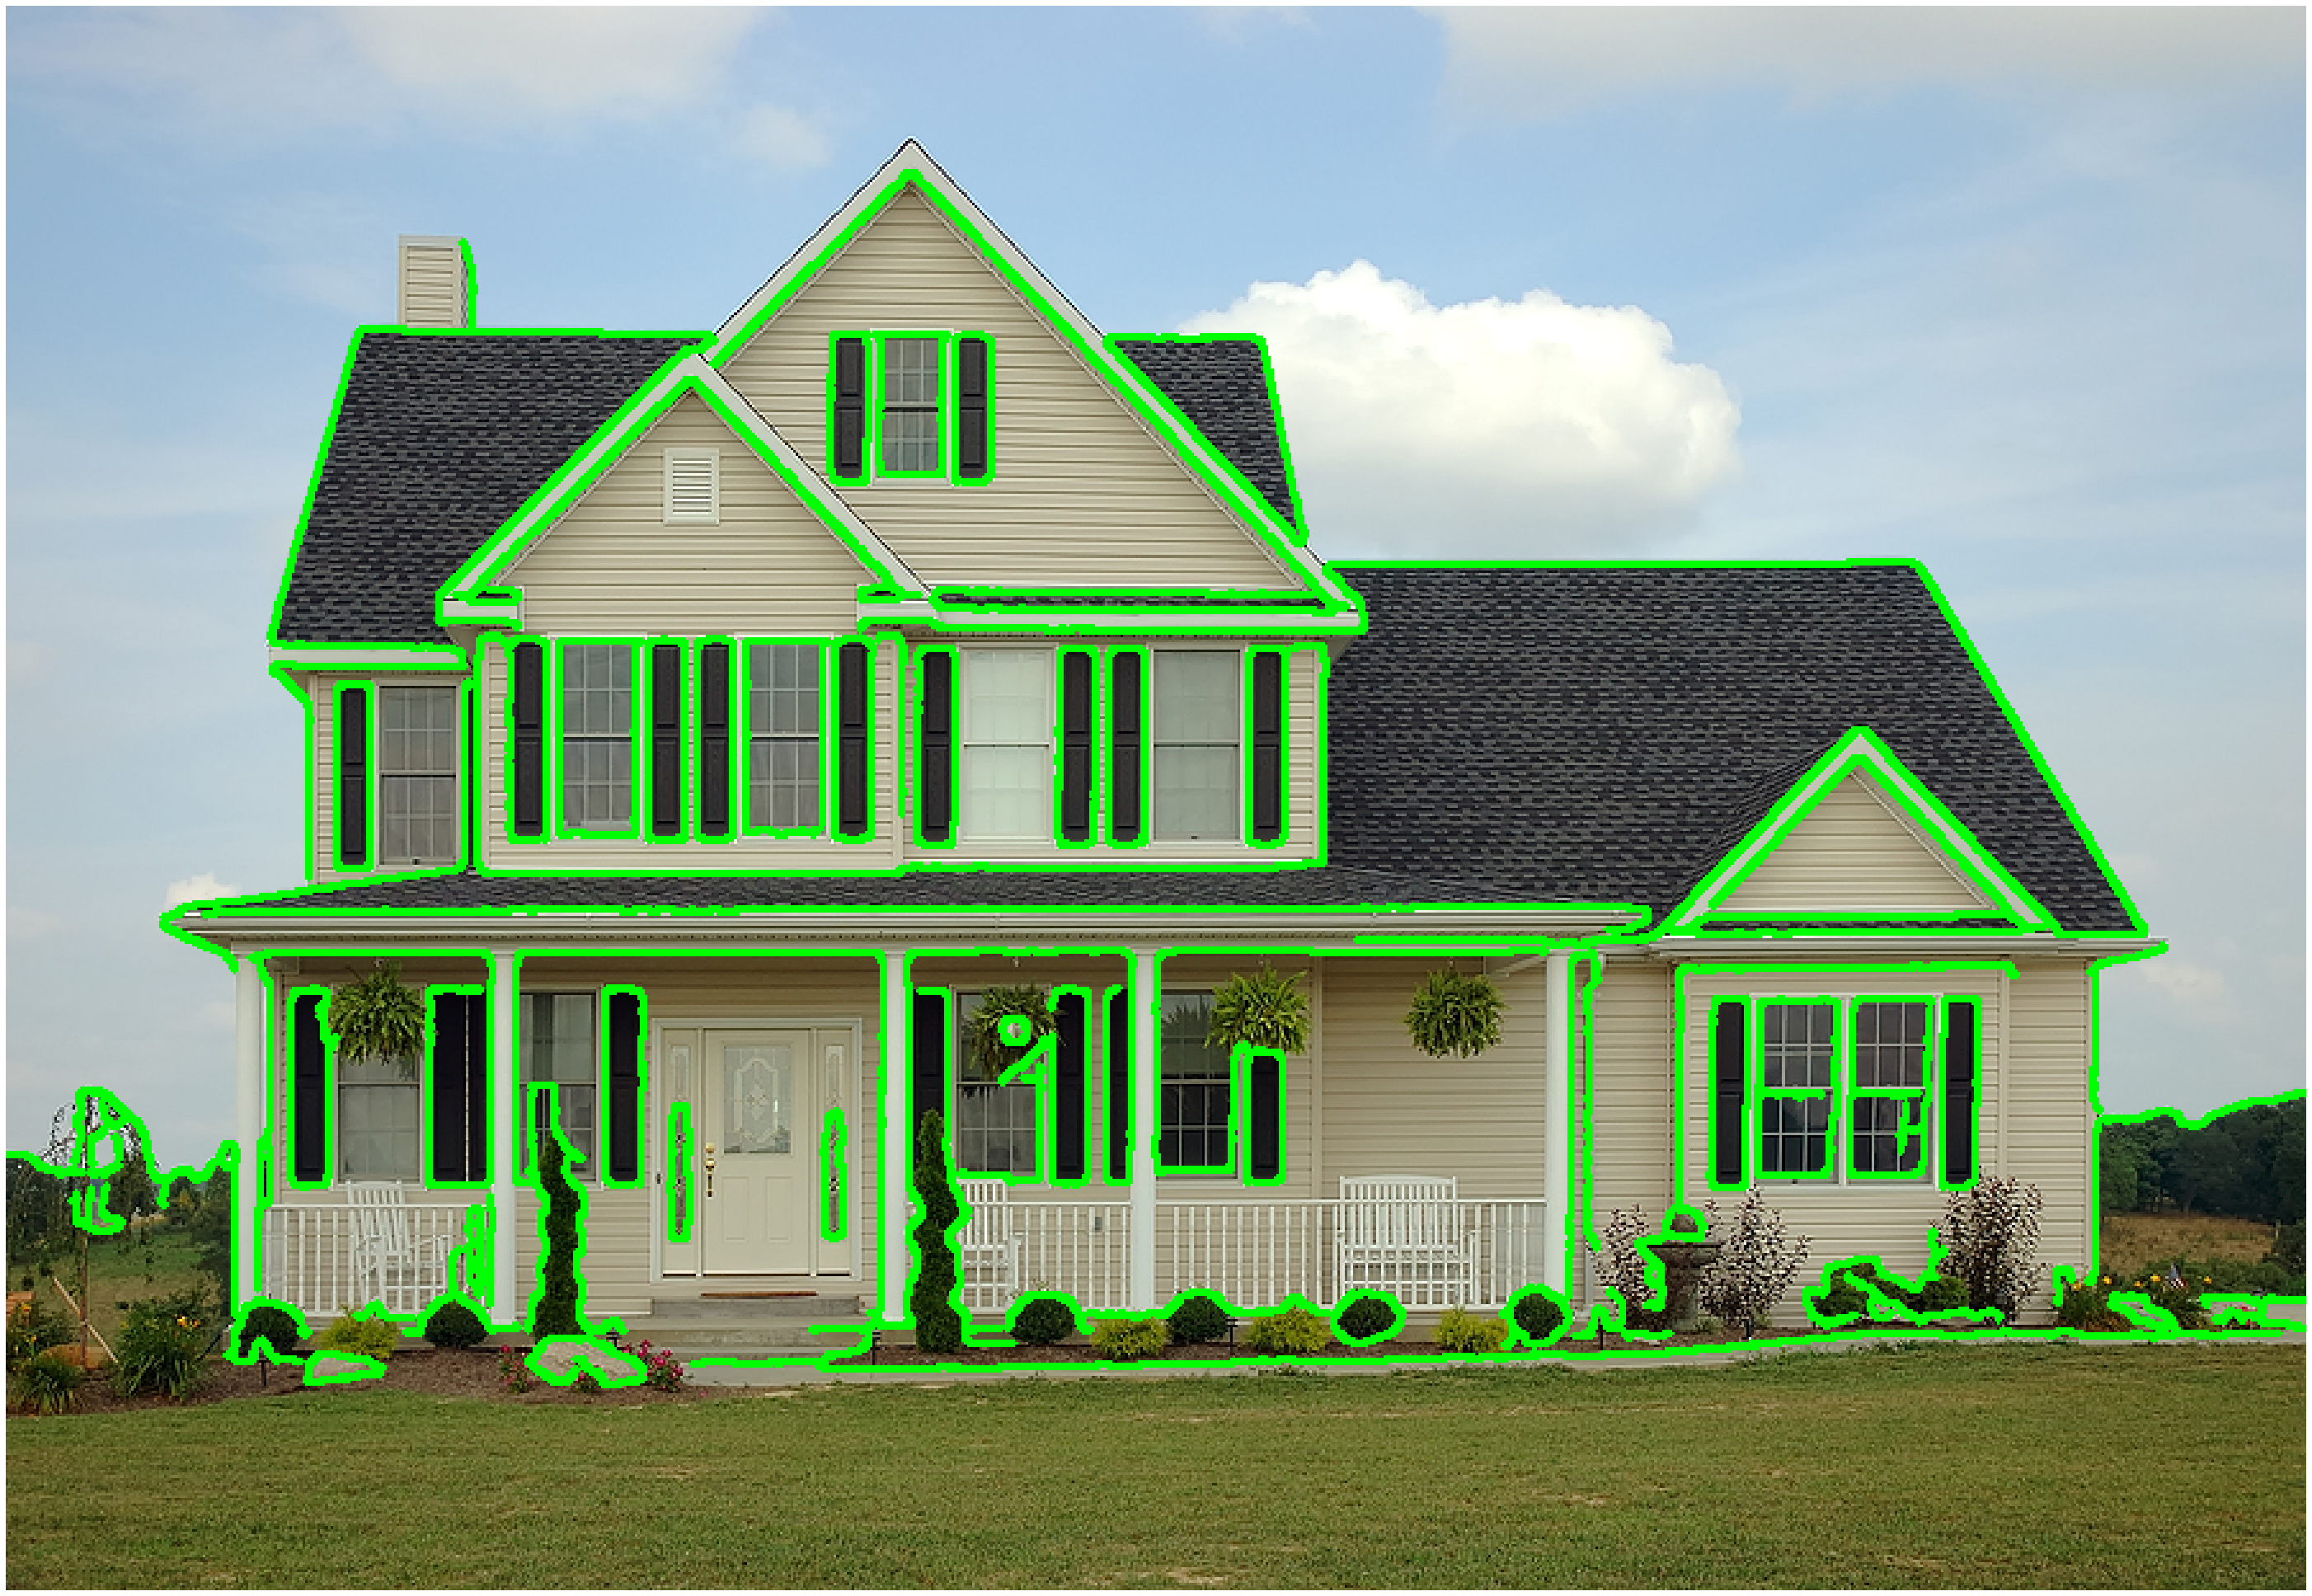

In [7]:
show(clone)

***

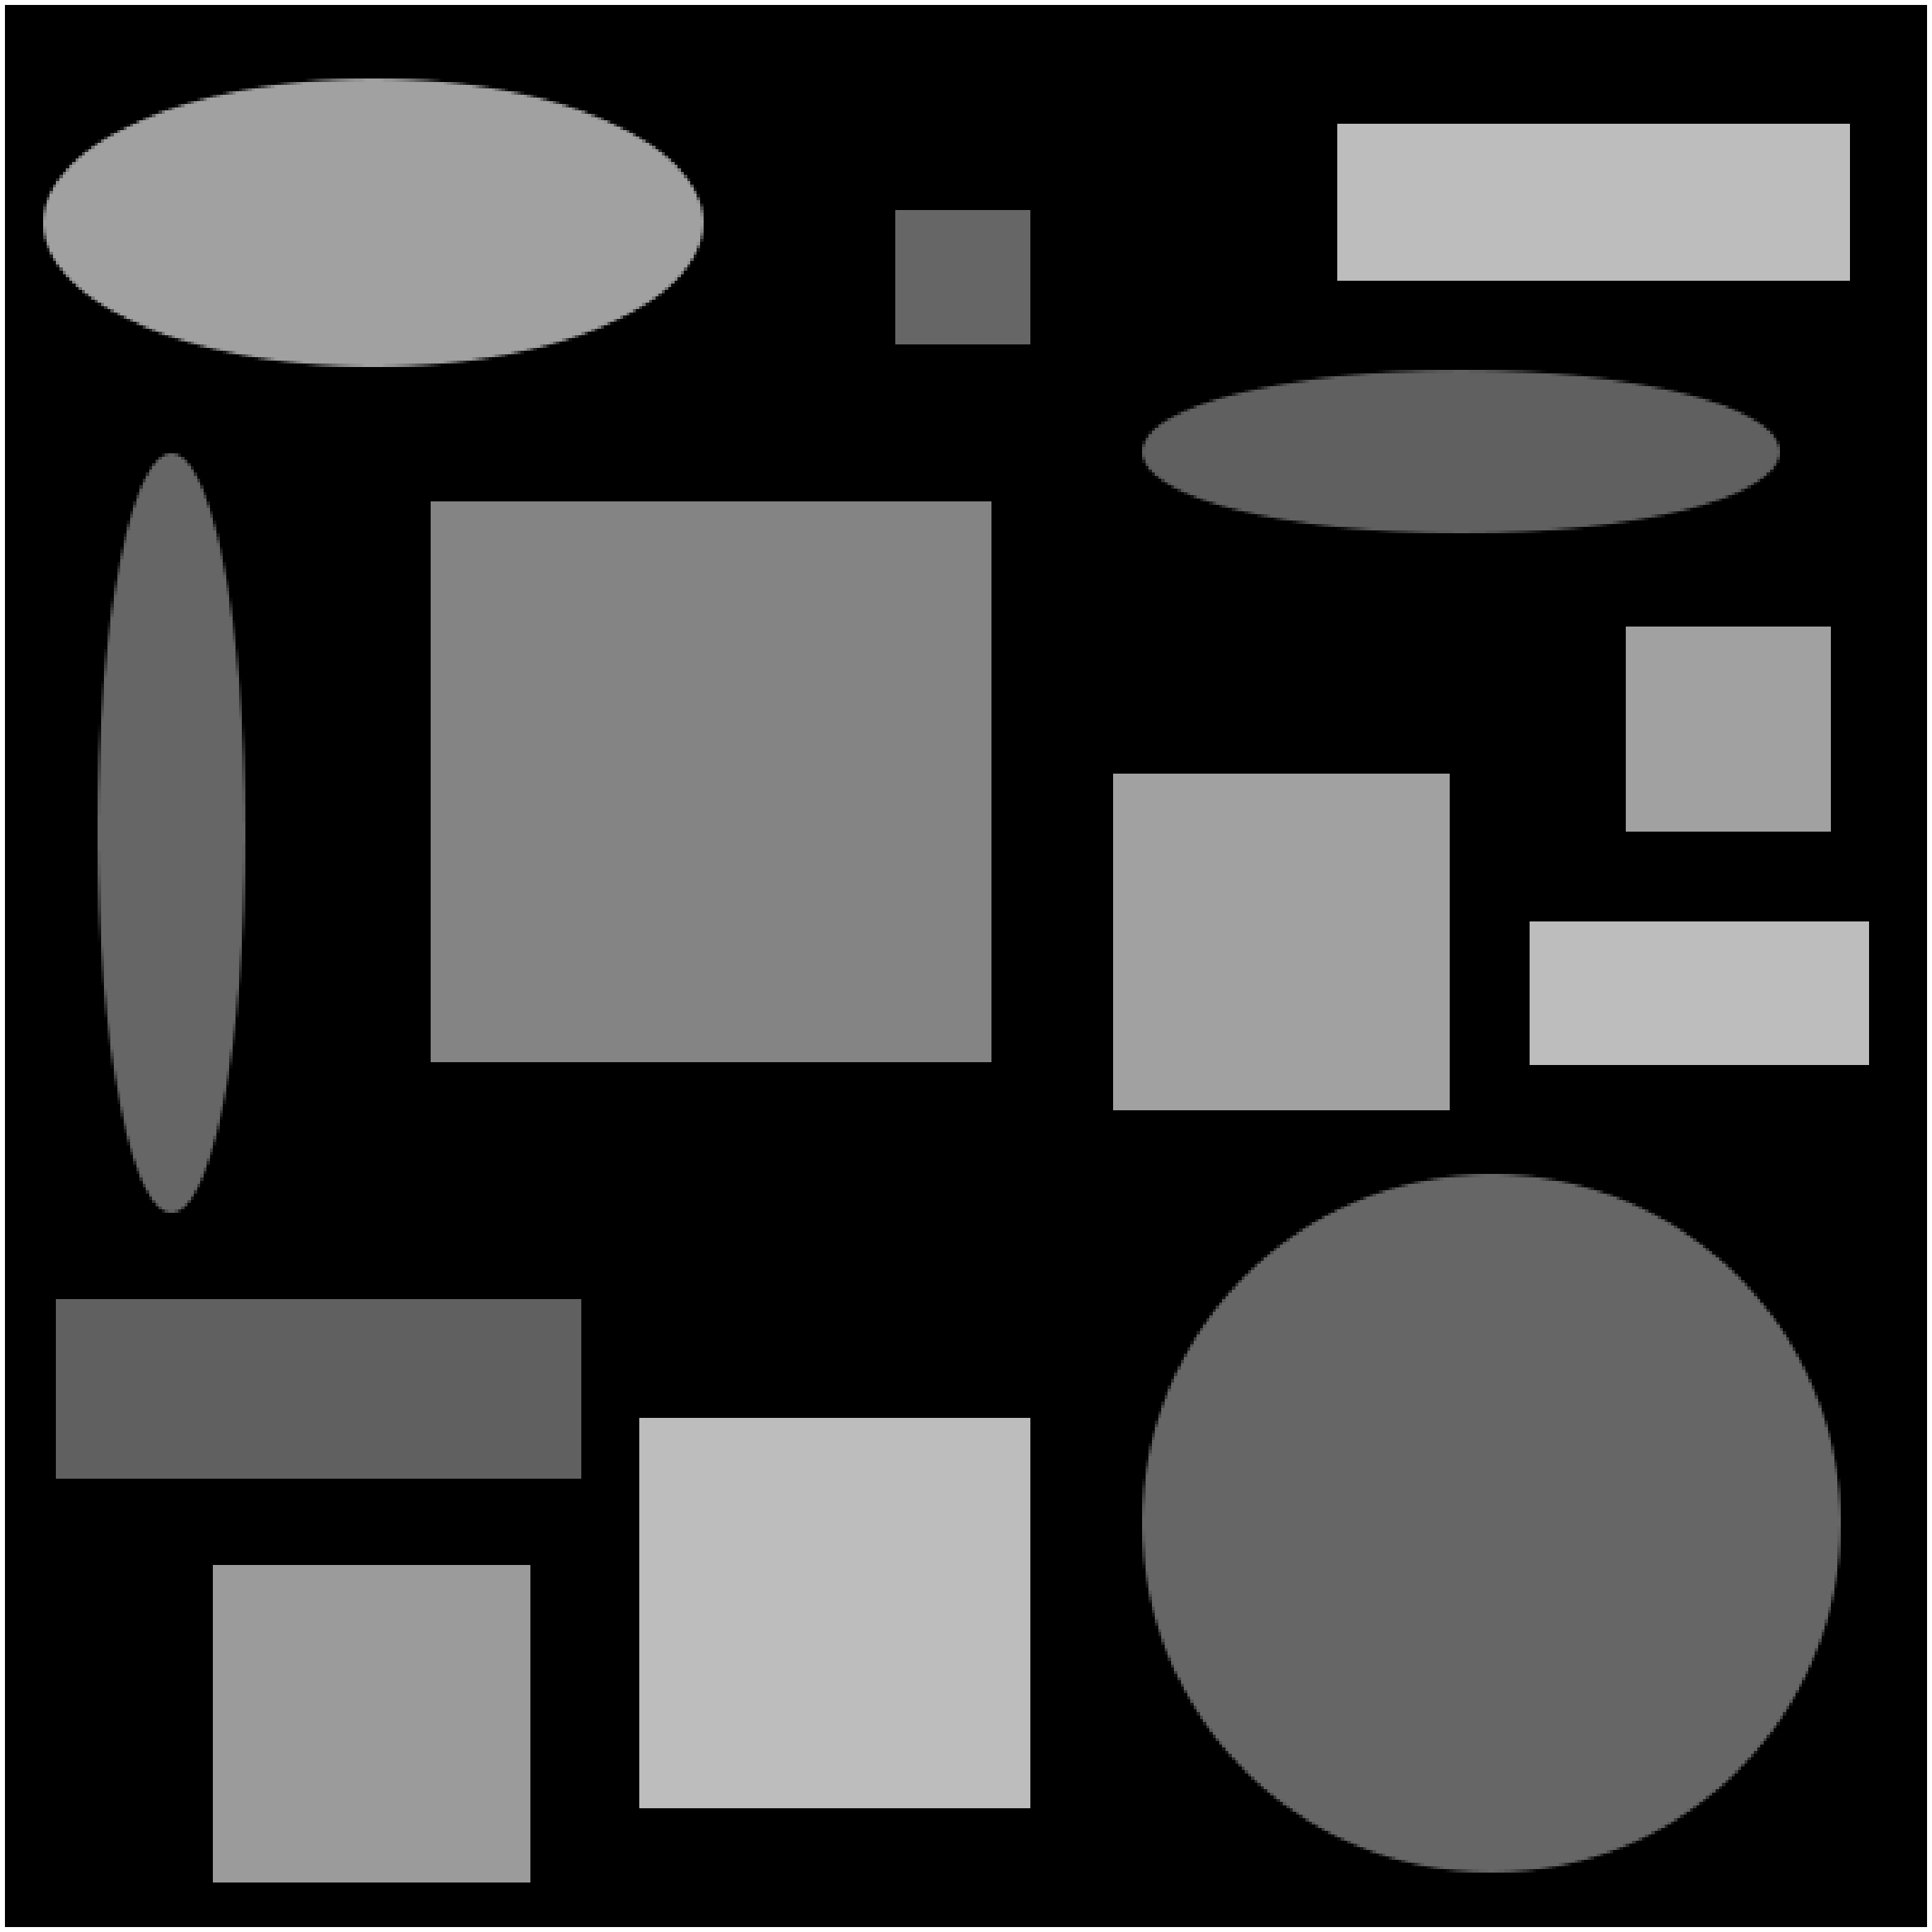

In [8]:
# Carregando a imagem e convertendo para escala de cinza
image = cv2.imread("imagens/shapes.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

In [9]:
# Encontra os contornos externos
cnts, _ = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
# A função findCountours é destrutiva, ou seja, ela altera a imagem. Por isso fazemos uma cópia.
clone = image.copy()

In [11]:
# Loop por todos os contornos
for (i, c) in enumerate(cnts):
    # Calcula a área e o perímetro do contorno
    area = cv2.contourArea(c)
    perimeter = cv2.arcLength(c, True)
    print ("Contorno #%d -- Area: %.2f, Perimetero: %.2f" % (i + 1, area, perimeter))
 
    # Desenha o contorno na imagem
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # Calcula o centro do contorno e desenha o número do contorno
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#%d" % (i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 255, 255), 4)

Contorno #1 -- Area: 9604.00, Perimetero: 392.00
Contorno #2 -- Area: 14641.00, Perimetero: 484.00
Contorno #3 -- Area: 8965.00, Perimetero: 436.00
Contorno #4 -- Area: 37385.00, Perimetero: 722.72
Contorno #5 -- Area: 4620.00, Perimetero: 298.00
Contorno #6 -- Area: 10816.00, Perimetero: 416.00
Contorno #7 -- Area: 3969.00, Perimetero: 252.00
Contorno #8 -- Area: 30276.00, Perimetero: 696.00
Contorno #9 -- Area: 8550.00, Perimetero: 517.48
Contorno #10 -- Area: 7970.00, Perimetero: 446.79
Contorno #11 -- Area: 1681.00, Perimetero: 164.00
Contorno #12 -- Area: 7632.00, Perimetero: 414.00
Contorno #13 -- Area: 14593.00, Perimetero: 508.33


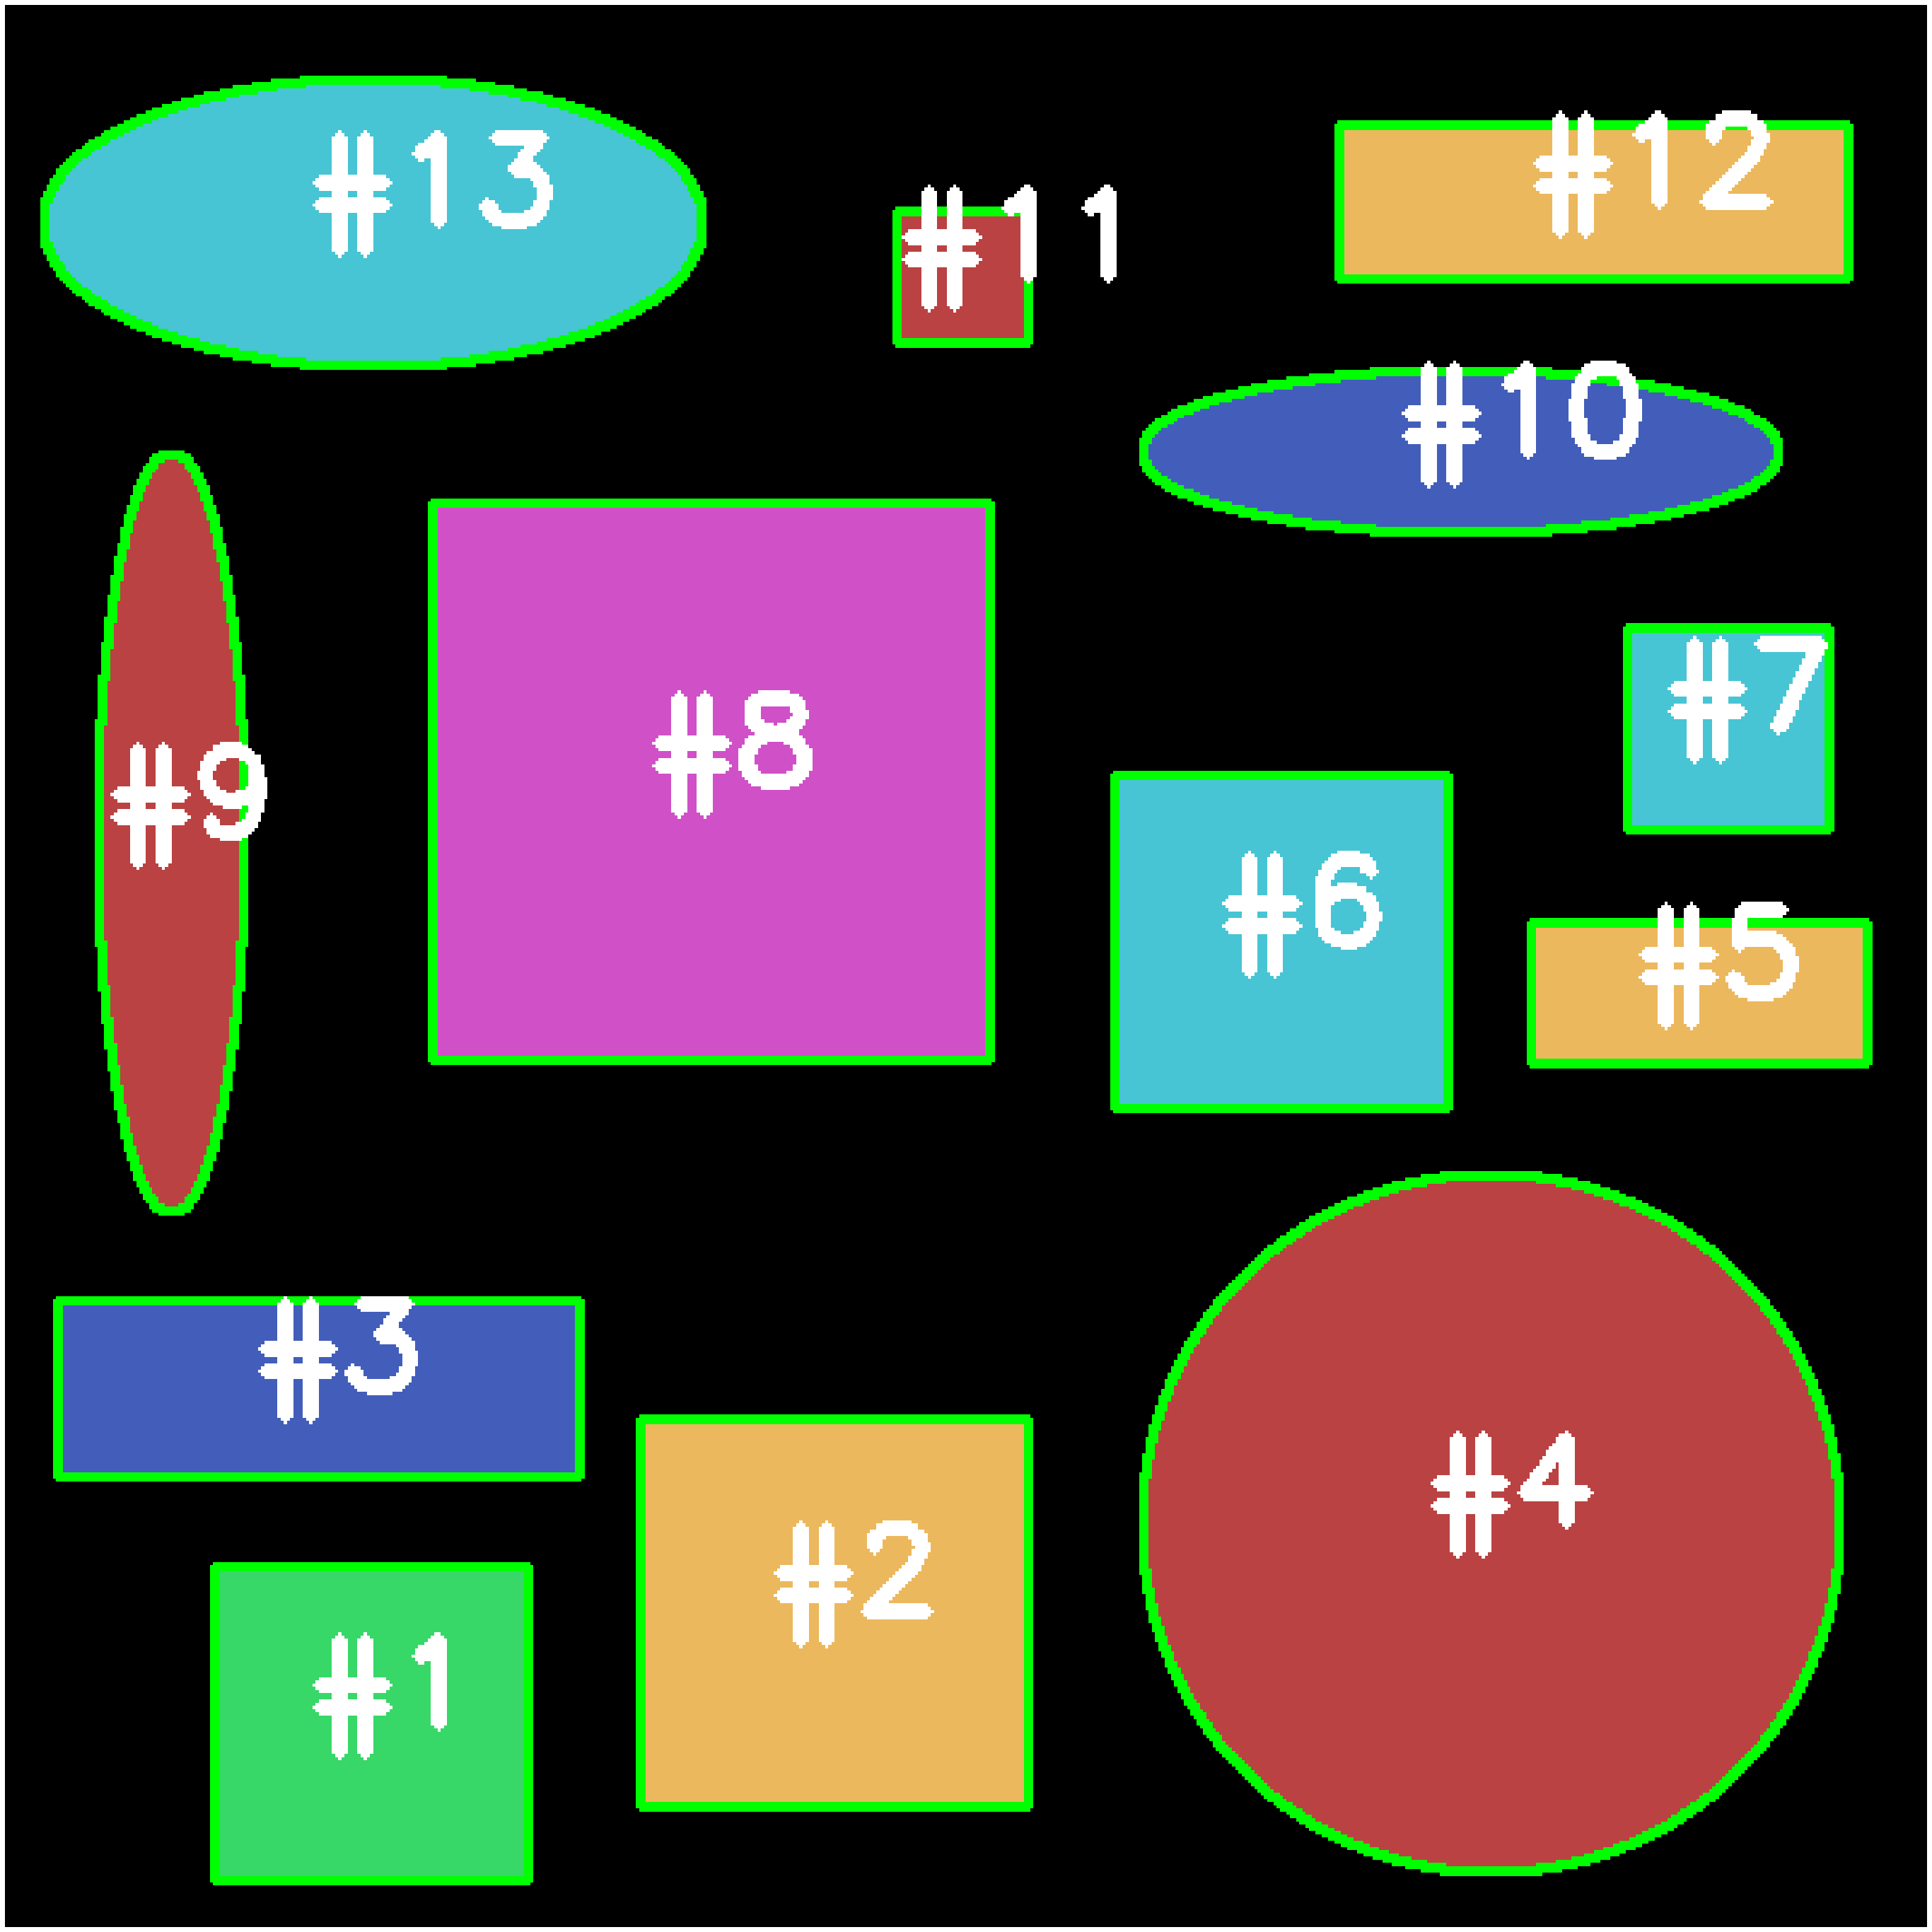

In [12]:
show(clone)

***

In [13]:
# A função findCountours é destrutiva, ou seja, ela altera a imagem. Por isso fazemos uma cópia.
clone = image.copy()

In [14]:
# Loop por todos os contornos
for c in cnts:
    # Aproxima o contorno
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01 * peri, True)
 
    # Se o contorno aproximado tiver 4 vértices, então estamos examinando um retângulo
    if len(approx) == 4:
        # Desenha o contorno e desenha o texto na imagem
        cv2.drawContours(clone, [c], -1, (0, 255, 255), 2)
        (x, y, w, h) = cv2.boundingRect(approx)
        cv2.putText(clone, "Retangulo", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

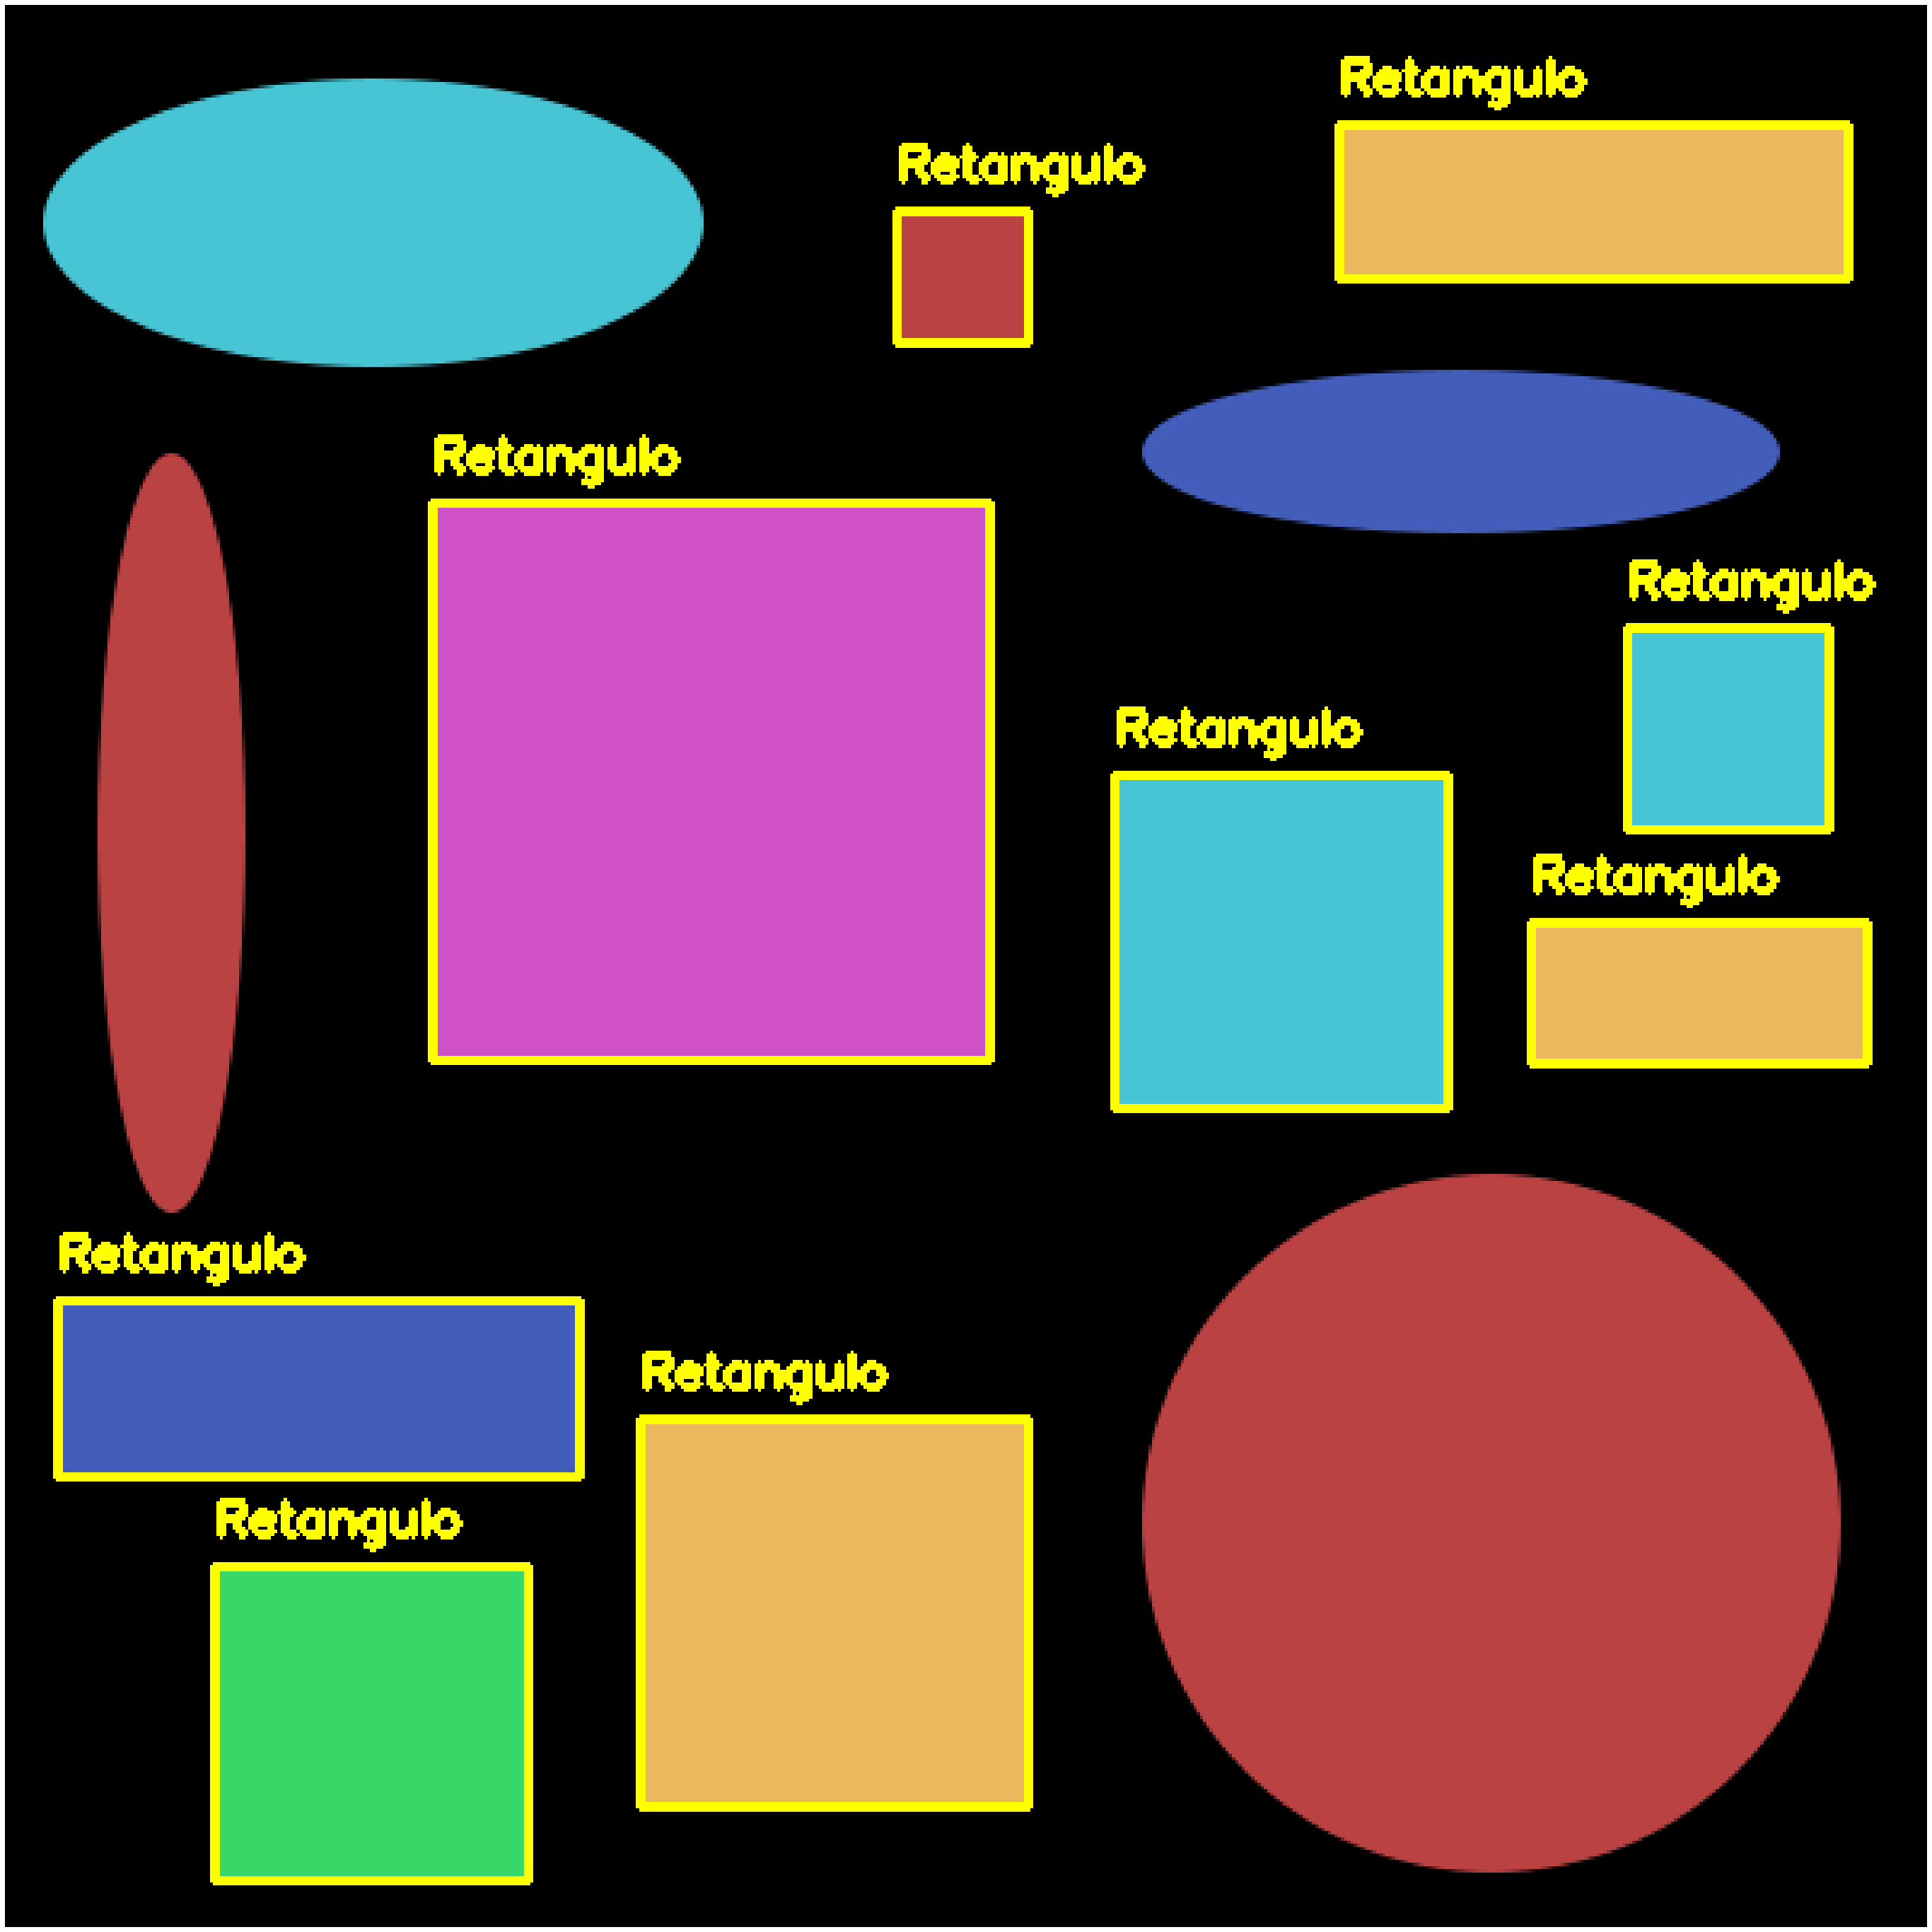

In [15]:
show(clone)